Compare two different embeddings from the doc2vec by sampling a subset of pairs and calculating the respective distances.
We then calculate the rank-correlation between the two different lists of measured distances.

This quantifies how much two different embeddings correspond to each other

- we do not care about the absolute value of the distance
- but is the relation between the distances conserved across different models

In [24]:
import numpy as np
import pylab as plt
import os,sys
import pandas as pd
import glob
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import pdist,cdist
%matplotlib inline  
%load_ext autoreload
%autoreload 2

## add src-path
src_dir = os.path.abspath(os.path.join(os.pardir,os.pardir,'src'))
sys.path[0] = src_dir

from common.stats import *
from scipy.stats import pearsonr,kendalltau,spearmanr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../../scripts/CORE/


In [26]:
model1 = '100-5-5-0'
model2 = '50-5-5-0'

## parameters
N_pairs = 10**3 # howmany pairs to compare
# n_seed = 10
metric = 'cosine' # which metric to use, default: cosine

In [27]:
## general path
path_read = ''
print(path_read)
fname_read = 'doc2vec_m%s_m%s_comparison_distances_%s_N%s'\
                %(model1,model2,metric,str(N_pairs))
filename = os.path.join(path_read,fname_read)
with open(filename,'r') as f:
    x=f.readlines()


../../scripts/CORE/


In [28]:
list_dist_x1 = [float(h.split()[0]) for h in x]
list_dist_x2 = [float(h.split()[1]) for h in x]


In [29]:
pearsonr(list_dist_x1,list_dist_x2)

(0.7659058063497981, 1.2036913054038733e-193)

## histograms and scatter plots

In [78]:
arr_bins = np.linspace(0.0,2.0,100)
H1,edges1 = np.histogram(list_dist_x1,bins=arr_bins)
H1 = H1/len(H1)
H1 = np.append(H1,0.0)

H2,edges2 = np.histogram(list_dist_x2,bins=arr_bins)
H2 = H2/len(H2)
H2 = np.append(H2,0.0)

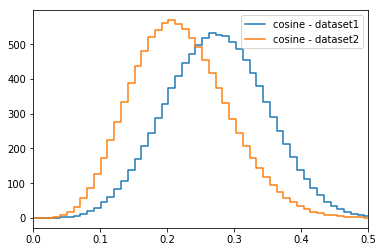

In [121]:
plt.step(arr_bins,H1,where='post',label='cosine - dataset1')
plt.step(arr_bins,H2,where='post',label='cosine - dataset2')
plt.xlim(0,0.5)
plt.legend()

[]

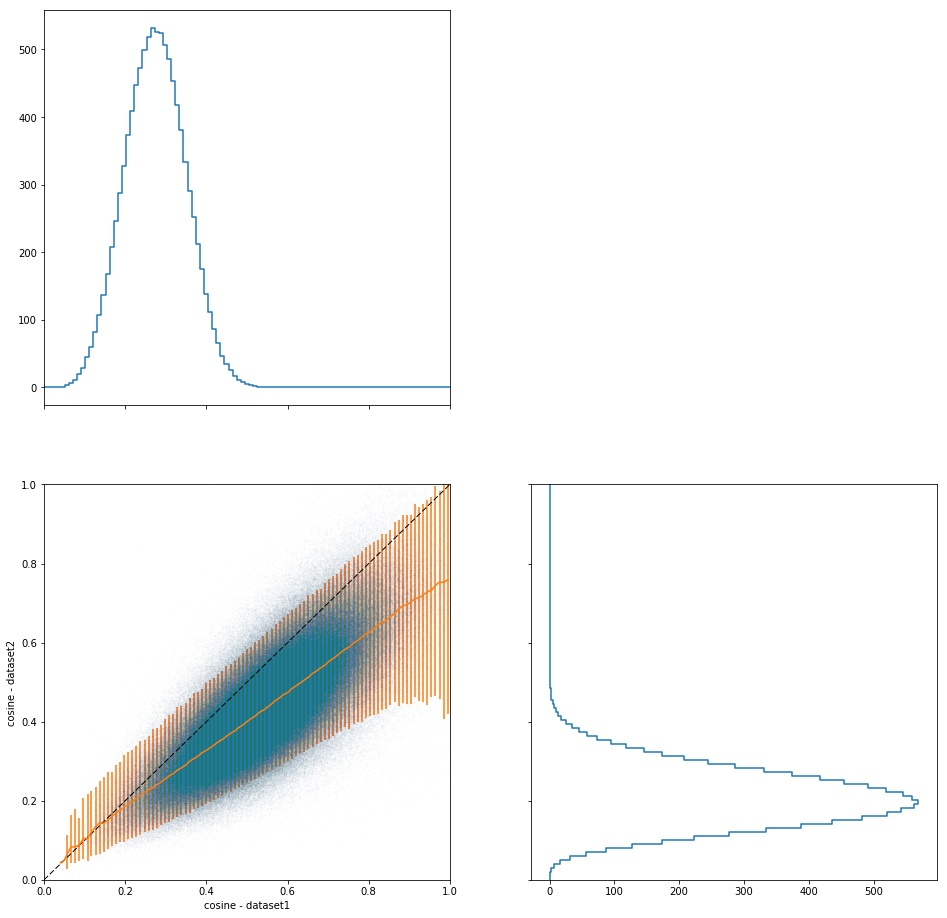

In [125]:
xmin = 0
xmax = 1

plt.figure(figsize=(16,16))
ax = plt.subplot(221)
ax.step(arr_bins,H1,where='post',label='cosine - dataset1')
ax.set_xlim(xmin,xmax)
ax.set_xticklabels([])

ax = plt.subplot(223)
ax.plot(list_dist_x1,list_dist_x2,marker='o',lw=0,ms=1,alpha=1.0/N_pairs*10000)
ax.plot([xmin,xmax],[xmin,xmax],lw=1,ms=0,color='black',ls='--')#alpha=1.0/N_pairs*10000)

arr_bins = np.linspace(xmin,xmax,100)
x_med,y_med,y_err = cond_median(list_dist_x1,list_dist_x2,arr_bins,y_perc = [2.5,97.5])

ax.errorbar(x_med,y_med,yerr=y_err)

ax.set_xlabel('cosine - dataset1')
ax.set_ylabel('cosine - dataset2')
ax.set_xlim(xmin,xmax)
ax.set_ylim(xmin,xmax)

ax = plt.subplot(224)
ax.step(H2,arr_bins,where='post',label='cosine - dataset2')
ax.set_ylim(xmin,xmax)
ax.set_yticklabels([])


## correlations

In [127]:
pearsonr(list_dist_x1,list_dist_x2)

(0.7671698333656719, 0.0)

In [128]:
spearmanr(list_dist_x1,list_dist_x2)

SpearmanrResult(correlation=0.76052294948393673, pvalue=0.0)

In [129]:
kendalltau(list_dist_x1,list_dist_x2)

KendalltauResult(correlation=0.56604041768841773, pvalue=0.0)

10000


In [130]:
# x_med,y_med,C_med = C_running_median(list_dist_x1,list_dist_x2,n_run = int(N_pairs/100))

# plt.plot(x_med,C_med[:,0],marker='o',ms=3,label='rank - correlation')
# plt.plot(x_med,C_med[:,1],marker='x',ms=3,label='p - value')
# plt.legend(bbox_to_anchor=(1,1))

In [131]:
# np.shape(C_med)